# Problem set 8: Mini-project

We've put some effort into building our collection (see problem set 7 for details and for links to texts and to metadata). Now it's time to learn something about it. You already have lots of excellent ideas for how to apply the tools we've learned about so far. It's also a good time of the semester to review what we have learned and practice applying it in less structured settings.

**You will work by yourself or in a group of up to three people** to complete a short project applying methods from the previous weeks to this collection. You will turn in the completed project as a single notebook (one submission per group) with the following sections:

1. **Question(s).** Describe what you wanted to learn. Suggest several possible answers or hypotheses, and describe in general terms what you might expect to see if each of these answers were true (save specific measurements for the next section). For example, many students want to know the difference between horror and non-horror, or between detective stories and horror fiction, but there are many ways to operationalize this question. You do not need to limit yourself to questions of genre. **Note that your question should be interesting! If the answer is obvious before you begin, or if it's something the importance of which you cannot explain, your grade will suffer (a lot).** (10 points)

1. **Methods.** Describe how you will use computational methods presented so far in this class to answer your question. What do the computational tools do, and how does their output relate to your question? Describe how you will process the collection into a form suitable for a model or algorithm and why you have processed it the way you have. (10 points)

1. **Code.** Carry out your experiments. Code should be correct (no errors) and focused (unneeded code from examples is removed). Use the notebook format effectively: code may be incorporated into multiple sections. (20 points)

1. **Results and discussion.** Use sorted lists, tables, and visual presentations to make your argument. Excellent projects will provide multiple views of results, and follow up on any apparent outliers or strange cases, including through careful reading of the original documents. (40 points)

1. **Reflection.** Describe your experience in this process. What was harder or easier than you expected? What compromises or negotiations did you have to accept to match the collection, the question, and the methods? What would you try next? (10 points)

1. **Responsibility and resources consulted.** Credit any online sources (Stack Overflow, blog posts, documentation) that you found helpful. (0 points, but -10 if missing)
    * **If you worked in a group**, set up a group submission in CMS. Each group member should submit (via CMS) a separate text file in which they describe each member's (including their own) contributions to the project.
    * Most people will turn in *either* a completed notebook for their solo project *or* a responsibility statement. The only people who will submit both files are those who are the designated submitter for their group. Don't worry if CMS warns you about a missing file (unless you're the group submitter).

Note that 10 points will be carried over from problem set 7.

**We will grade this work based on accuracy, thoroughness, creativity, reflectiveness, and quality of presentation.**

**Scope:** this is a *mini*-project, with a short deadline. We are expecting work that is consistent with that timeframe, but that is serious, thoughtful, and rigorous. This problem set will almost certainly require more time and effort than many of the others. **For group work, the expected scope grows linearly with the number of participants.**

# 0. Project team

List here the members of your project team, including yourself.

Joshua Hong (jh976)
Haokun Sun (hs932)
Frances Wang (xw568)

# 1. Question(s)

How is the sentiment score related to the following independent variables:
    

# 2. Methods

Sentiment Analysis with Emolex to get Sentiment Score

# 3. Code

In [1]:
# Imports (all of them!)
import pandas as pd
from pathlib import Path
import numpy as np
from glob import glob
import os
import string
from nltk import pos_tag 
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from collections import defaultdict
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.inspection import permutation_importance
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/joshuahong/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
path = Path('..', '..', 'data', 'corpus_list.csv')
#path = os.path.join('..', '..', 'data', 'Info6350_MiniP_data_v2.csv')
data = pd.read_csv(path)

# generate dummy variables for English, PovFirst, female, horror, detective and adaptation (1 if "True")

data["dHorror"] = data["horror"].astype(int)
data["dDetective"] = data["detective"].astype(int)
data["dAdaptation"] = data["adaptation"].astype(int)
data['dEnglish'] = np.where(data['language'] == 'en', 1, 0)
data['dPovFirst'] = np.where(data['pov'] == 'first', 1, 0)
data['dFemale'] = np.where(data['gender'] == 'female', 1, 0)

# convert all 'gb' to  'uk' 
data['country'] = data['country'].replace(['gb'],'uk')

# generate dummy variables for Romantic, Victorian, Modern and PostModern literature period (1 if "True")
data['dRomanticP'] = np.where((data['year'] >=  1790) & (data['year'] <= 1830), 1, 0)
data['dVictorianP'] = np.where((data['year'] >=  1832) & (data['year'] <= 1901), 1, 0)
data['dModernP'] = np.where((data['year'] >=  1914) & (data['year'] <= 1945), 1, 0)
data['dPostModernP'] = np.where((data['year'] >=  1945), 1, 0)

# generate dummy variables for FranceWar, USWar, UKWar, GermanyWar and War literature period (1 if the written was done during the writer's motherland war)
data['dFranceWar'] = np.where((data['year'] >=  1830) & (data['year'] <= 1848) & (data['country'] == 'fr'), 1, 0)
data['dUKWar'] = np.where((((data['year'] >=  1914) & (data['year'] <= 1918)) | ((data['year'] >=  1939) & (data['year'] <= 1945))) & (data['country'] == 'uk'), 1, 0)
data['dUSWar'] = np.where((((data['year'] >=  1914) & (data['year'] <= 1918)) | ((data['year'] >=  1939) & (data['year'] <= 1945)) | ((data['year'] >=  1861) & (data['year'] <= 1865))) & (data['country'] == 'us'), 1, 0)
data['dGermanyWar'] = np.where((((data['year'] >=  1914) & (data['year'] <= 1918)) | ((data['year'] >=  1939) & (data['year'] <= 1945))) & ((data['country'] == 'de') | (data['country'] == 'cz')), 1, 0)
data['dWar'] = np.where((data['dFranceWar'] ==  1) | (data['dUKWar'] ==  1)| (data['dUSWar'] ==  1)| (data['dGermanyWar'] ==  1), 1, 0)

# summary statistics for key variables
data[['wordcount', 'language', 'age', 'dScience', 'dHorror', 'dDetective', 'dAdaptation', 'dEnglish', 'dPovFirst', 'dFemale', 'dRomanticP', 'dVictorianP', 'dModernP', 'dPostModernP', 'dWar']].describe()  

for i in range(len(data)): # changing male = 1 & female = 0
    if data['gender'][i] == 'female':
        data['gender'][i] = 0
    elif data['gender'][i] == 'male': 
        data['gender'][i] = 1

<ipython-input-3-131755bcd55b>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'][i] = 0
<ipython-input-3-131755bcd55b>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'][i] = 1


In [4]:
countries_list = list(data['country'].unique()) # finding unique values per columns I think are important
form_list = list(data['form'].unique())
language_list = list(data['language'].unique())
pov_list = list(data['pov'].unique())
for i in range(len(data)): # using index of the list of unique values to make values numeric since classification can't use strings in models
    data['country'][i] = countries_list.index(data['country'][i])
    data['form'][i] = form_list.index(data['form'][i])
    data['language'][i] = language_list.index(data['language'][i])
    data['pov'][i] = pov_list.index(data['pov'][i])

<ipython-input-4-45b112fd7bf9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country'][i] = countries_list.index(data['country'][i])
<ipython-input-4-45b112fd7bf9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['form'][i] = form_list.index(data['form'][i])
<ipython-input-4-45b112fd7bf9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['language'][i] = language_list.index(data['language'][i])
<ipython-input-4-45b112

In [5]:
novel_files = glob(os.path.join('..', '..', 'data','novels', '*.txt'))
emolex_file = os.path.join('..', '..','data','lexicons','emolex.txt')

In [18]:
# novel_files = glob(os.path.join('/Users/francesw/desktop/info 6350','hw','texts', '*.txt'))
# emolex_file = os.path.join('/Users/francesw/desktop/info 6350','data','lexicons','emolex.txt')

In [19]:
# Vader sentiment analysis 

def clean_text(text):
    text = text.lower()
    #tokenize text and remove punctuation 
    text = [word.strip(string.punctuation) for word in text.split(" ") ]
    #remove words that contain numbers 
    text = [word for word in text if not any(c.isdigit() for c in word)]
    #remove stop words 
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    #remove empty tokens 
    text = [t for t in text if len(t)>0]
    #pos tag text 
    pos_tags = pos_tag(text)
    #remove words with only one letter
    text = [t for t in text if len(t) > 1]
    #join all
    text = " ".join(text)
    return(text)

sid = SentimentIntensityAnalyzer()

for novel in novel_files: # Iterate over novels / encoding="ISO-8859-1"
    with open(novel, encoding="utf8",errors='ignore') as f: 
        novel_text = f.read() # Read a novel as a string
    novel_label = os.path.split(novel)[1].rstrip('.txt') # Get convenience label for novel
    tokens = clean_text(novel_text) # Tokenize
    print(sid.polarity_scores(tokens))

{'neg': 0.09, 'neu': 0.683, 'pos': 0.227, 'compound': 1.0}
{'neg': 0.217, 'neu': 0.524, 'pos': 0.259, 'compound': 1.0}
{'neg': 0.175, 'neu': 0.705, 'pos': 0.119, 'compound': -1.0}
{'neg': 0.092, 'neu': 0.645, 'pos': 0.263, 'compound': 1.0}
{'neg': 0.183, 'neu': 0.639, 'pos': 0.179, 'compound': -0.9998}
{'neg': 0.13, 'neu': 0.69, 'pos': 0.18, 'compound': 1.0}
{'neg': 0.128, 'neu': 0.694, 'pos': 0.178, 'compound': 1.0}
{'neg': 0.107, 'neu': 0.67, 'pos': 0.223, 'compound': 1.0}
{'neg': 0.123, 'neu': 0.717, 'pos': 0.16, 'compound': 1.0}
{'neg': 0.111, 'neu': 0.776, 'pos': 0.112, 'compound': -0.9991}
{'neg': 0.121, 'neu': 0.706, 'pos': 0.173, 'compound': 1.0}
{'neg': 0.121, 'neu': 0.713, 'pos': 0.166, 'compound': 1.0}
{'neg': 0.121, 'neu': 0.742, 'pos': 0.136, 'compound': 0.9997}
{'neg': 0.092, 'neu': 0.758, 'pos': 0.15, 'compound': 1.0}
{'neg': 0.151, 'neu': 0.735, 'pos': 0.114, 'compound': -1.0}
{'neg': 0.159, 'neu': 0.711, 'pos': 0.13, 'compound': -1.0}
{'neg': 0.147, 'neu': 0.682, 'pos'

KeyboardInterrupt: 

In [105]:
pd.DataFrame(sid.polarity_scores(tokens),index = ['neg','neu','pos'])

,neg,neu,pos,compound
neg,0.123,0.725,0.151,1.0
neu,0.123,0.725,0.151,1.0
pos,0.123,0.725,0.151,1.0


In [6]:
def compare_scores(scores_dict): # code from class 
    '''
    Takes a dictionary of cross_validate scores.
    Returns a color-coded Pandas dataframe that summarizes those scores.
    '''
    import pandas as pd
    df = pd.DataFrame(scores_dict).T.applymap(np.mean).style.background_gradient(cmap='RdYlGn')
    return df

In [7]:
#sentiment analysis using emolex provided from class

def tokenize_text(text, stopwords=None):
    '''
    Takes a string.
    Returns a list of tokenized sentences.
    '''
    tokenized_text = []
    for sent in sent_tokenize(text):
        tokens = word_tokenize(sent.lower())
        if stopwords != None:
            tokens = [token for token in tokens if token not in stopwords]
        tokenized_text.append(tokens)
    return tokenized_text

# Build stopword list with punctuation
stopwords = set(['and','but','am','is','are','was','were','be','being','been','the','a','an','of',
                'on','under','above','out','in','at','with','have','has','had', "'s"])
stopwords = stopwords.union(set(string.punctuation))


In [10]:
# read and parse the emolex file
def read_emolex(filepath=None):
    '''
    Takes a file path to the emolex lexicon file.
    Returns a dictionary of emolex sentiment values.
    '''
    if filepath==None: # Try to find the emolex file
        filepath = emolex_file
        if os.path.isfile(filepath):
            pass
        elif os.path.isfile('emolex.txt'):
            filepath = 'emolex.txt'
        else:
            raise FileNotFoundError('No EmoLex file found')
    emolex = defaultdict(dict) # Like Counter(), defaultdict eases dictionary creation
    with open(filepath, 'r') as f:
    # emolex file format is: word emotion value
        for line in f:
            word, emotion, value = line.strip().split()
            emolex[word][emotion] = int(value)
    return emolex

# Get EmoLex data
emolex = read_emolex(emolex_file)

In [11]:
# Sentiment scoring function
def sentiment_score(token_list, lex=None):
    '''
    Takes a tokenized sentence.
    Returns a dictionary of length-normalized EmoLex sentiment scores.
    '''
    if lex==None: # reading emolex everytime
        lex = read_emolex() 
    sent_score = { #making a dictionary with the scores and sentiments
  'anger': 0.0, 
  'anticipation': 0.0, 
  'disgust': 0.0, 
  'fear': 0.0, 
  'joy': 0.0, 
  'negative': 0.0, 
  'positive': 0.0, 
  'sadness': 0.0, 
  'surprise': 0.0, 
  'trust': 0.0
    }
    count = 0 
    for i, sent in enumerate(token_list): #so since we are not actually iterating through token list, we have to seperate each tokenized text into token list and index
        for x in sent: #so after seperating, we look at each token list 
            if x in emolex: # if an element in the list is in emolex 
                for y in sent_score: # we then iterate through our own dictionary we have (above)
                    sent_score[y] = sent_score[y] + emolex[x][y] #and we look at every element in our sent_score dict and update the scores based on the numbers in emolex[word][sentiment]
            count += 1 #this counts each sentence (can change, up to you, can indent again for every element)
    for i in sent_score: #you can comment this out to see the actual scores of each emotion (as in how many times each emotion is present)
        sent_score[i] = sent_score[i]/count #each score/count
    return(sent_score)

In [12]:
def visualize_emotion_scores(scores): #from class
    import pandas as pd
    import seaborn as sns
    df = pd.DataFrame.from_dict(scores)
    values = df.columns
    df = df.reset_index().melt(id_vars='index', value_vars=values, var_name='emotion').rename(columns={'index':'gender'})
    sns.set_context('poster')
    g = sns.catplot(x='gender', y='value', col='emotion', data=df, kind='bar', col_wrap=4)
    return g

In [13]:
%%time
corpus_scores = {} # Dictionary to hold results
for novel in novel_files: # Iterate over novels / encoding="ISO-8859-1"
    with open(novel, encoding="utf8",errors='ignore') as f: #ignoring any errors because it wouldn't matter since there are so many txts/novels
        novel_text = f.read() # Read a novel as a string
    novel_label = os.path.split(novel)[1] # Get convenience label for novel
    tokens = tokenize_text(novel_text) # Tokenize
#     for i, sent in enumerate(tokens):
    scores = sentiment_score(tokens,lex=emolex) # Score
    corpus_scores[novel_label] = scores # Record scores

CPU times: user 1min 50s, sys: 1.82 s, total: 1min 52s
Wall time: 2min 9s


In [14]:
corpus_scores

{'a_sweet_little_maid.txt': {'anger': 0.006179154560707124,
  'anticipation': 0.01929451241969145,
  'disgust': 0.004828743299095634,
  'fear': 0.00890043786062119,
  'joy': 0.017575807177640464,
  'negative': 0.01761672873102263,
  'positive': 0.03105945901706429,
  'sadness': 0.010332692228997013,
  'surprise': 0.00859352621025494,
  'trust': 0.020338012030936693},
 'Mathilda.txt': {'anger': 0.022185246810870772,
  'anticipation': 0.028629532789266568,
  'disgust': 0.016718168132477618,
  'fear': 0.02789002456223754,
  'joy': 0.028233367667643873,
  'negative': 0.04814726778121121,
  'positive': 0.05055066951905554,
  'sadness': 0.03158756569738267,
  'surprise': 0.015133507645986847,
  'trust': 0.029791617146026465},
 'the_island_of_doctor_moreau.txt': {'anger': 0.015412214034952356,
  'anticipation': 0.0148335326569191,
  'disgust': 0.009991898460707534,
  'fear': 0.023783804637166776,
  'joy': 0.012133019559430578,
  'negative': 0.04064272211720227,
  'positive': 0.028509702557771

In [15]:
data['anger'] = 0.0 #making columns in the dataframe
data['anticipation'] =0.0 
data['disgust'] =0.0 
data['fear'] =0.0 
data['joy'] =0.0 
data['negative'] =0.0 
data['positive'] =0.0 
data['sadness'] =0.0 
data['surprise'] =0.0 
data['trust'] =0.0 
sentiment_list = ['anger','anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']
for i in corpus_scores: #iterating through corpus_scores (will give novel_name.txt)
    for x in range(len(data)): #iterating through data df using range(len) to index each row
        if i == data['filename'][x]: #if i (novel_name.txt) = data['filename'][row]
            for y in sentiment_list:  #iterate through sentiment_list ->
                data[y][x] = corpus_scores[i][y] #so when data[row]['sentiment'] = corpus_scores[file_name.txt]['sentiment']

<ipython-input-15-9d42c258e302>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y][x] = corpus_scores[i][y] #so when data[row]['sentiment'] = corpus_scores[file_name.txt]['sentiment']


In [16]:
data.head()

,owner,check_1,check_2,filename,title,author_surname,author_givenname,year,birth_year,genre,...,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,ks2373,aj445,jw2295,Little_Women_Alcott.txt,Little Women,Alcott,Louisa May,1868,1832,"comedy, children's literature",...,0.010340,0.027066,0.008799,0.012736,0.028709,0.028802,0.051807,0.016159,0.013963,0.028673
1,jh976,sml347,jcm497,The_Great_God_Pan.txt,The Great God Pan,Arthur,Machen,1894,1863,Horror,...,0.011352,0.019807,0.010686,0.018437,0.015540,0.030689,0.034055,0.017928,0.011195,0.023682
2,jz543,asc334,aml449,The_Lost_Kafoozalum.txt,The Lost Kafoozalum,Ashwell,Pauline,1960,1928,Science Fiction,...,0.009491,0.019563,0.006082,0.015418,0.009220,0.025335,0.030100,0.012977,0.008639,0.019563
3,yw458,sml347,me363,mansfield_park.txt,Mansfield Park,Austen,Jane,1814,1775,"romance, historical",...,0.009017,0.025265,0.006784,0.012423,0.022607,0.024807,0.050260,0.012880,0.011250,0.029703
4,kjk248,ay329,jcm497,pride_and_prejudice.txt,Pride and Prejudice,Austen,Jane,1813,1775,"fiction, romance",...,0.008587,0.024625,0.006419,0.011948,0.022899,0.024843,0.051194,0.011927,0.011344,0.029052


In [17]:
M_author = [] #making lists for titles written by male or female authors 
F_author = []
for i in range(len(data)): #iterating through range(len(data))
    if data['gender'][i] == 1: #appending all titles when gender = 1 to M_author list
        M_author.append(data['title'][i])
    else:
        F_author.append(data['title'][i]) #appending all titles when gender = 0 to F_author list

M_dict = defaultdict(lambda:0) #creating dictionaries to hold sentiments per author lists
F_dict = defaultdict(lambda:0)
for i in range(len(data)): #iterating through each title when it is found in M_author or F_author and adding its sentiment scores in the dictionary from above
    for x in M_author:
        if x == data['title'][i]: 
            for y in sentiment_list:
                M_dict[y] = M_dict[y] + data[y][i]
    for a in F_author: 
        if a == data['title'][i]: 
            for y in sentiment_list:
                F_dict[y] = F_dict[y] + data[y][i]
for y in sentiment_list: #dividing each dictionary sentiment value by the amount of books in each dictionary (normalizing- might be a better way to do this)
    M_dict[y] = M_dict[y]/len(M_author)
    F_dict[y] = F_dict[y]/len(F_author)
    
final_dict = defaultdict(lambda: defaultdict(list)) #similar to gendered sentiment from class, but basically putting the normalized values of each sentiment
#as M_author & F_author per sentiment- so what i mean is doing this ex. {anger: [m_author:0.0, f_author:0.0]}
for i in sentiment_list:
    final_dict[i]['M_author'] = M_dict[i]
    final_dict[i]['F_author'] = F_dict[i]
print(len(F_author))
print(len(M_author))
display(final_dict)

71
65


defaultdict(<function __main__.<lambda>()>,
            {'anger': defaultdict(list,
                         {'M_author': 0.010147627103858782,
                          'F_author': 0.011152504292005986}),
             'anticipation': defaultdict(list,
                         {'M_author': 0.015902180674797463,
                          'F_author': 0.019525428629071025}),
             'disgust': defaultdict(list,
                         {'M_author': 0.007419805553061348,
                          'F_author': 0.008101717633488234}),
             'fear': defaultdict(list,
                         {'M_author': 0.014852559222203318,
                          'F_author': 0.015688018576211875}),
             'joy': defaultdict(list,
                         {'M_author': 0.012351915825565865,
                          'F_author': 0.01616752406815222}),
             'negative': defaultdict(list,
                         {'M_author': 0.0251125593739436,
                          'F_author': 0.

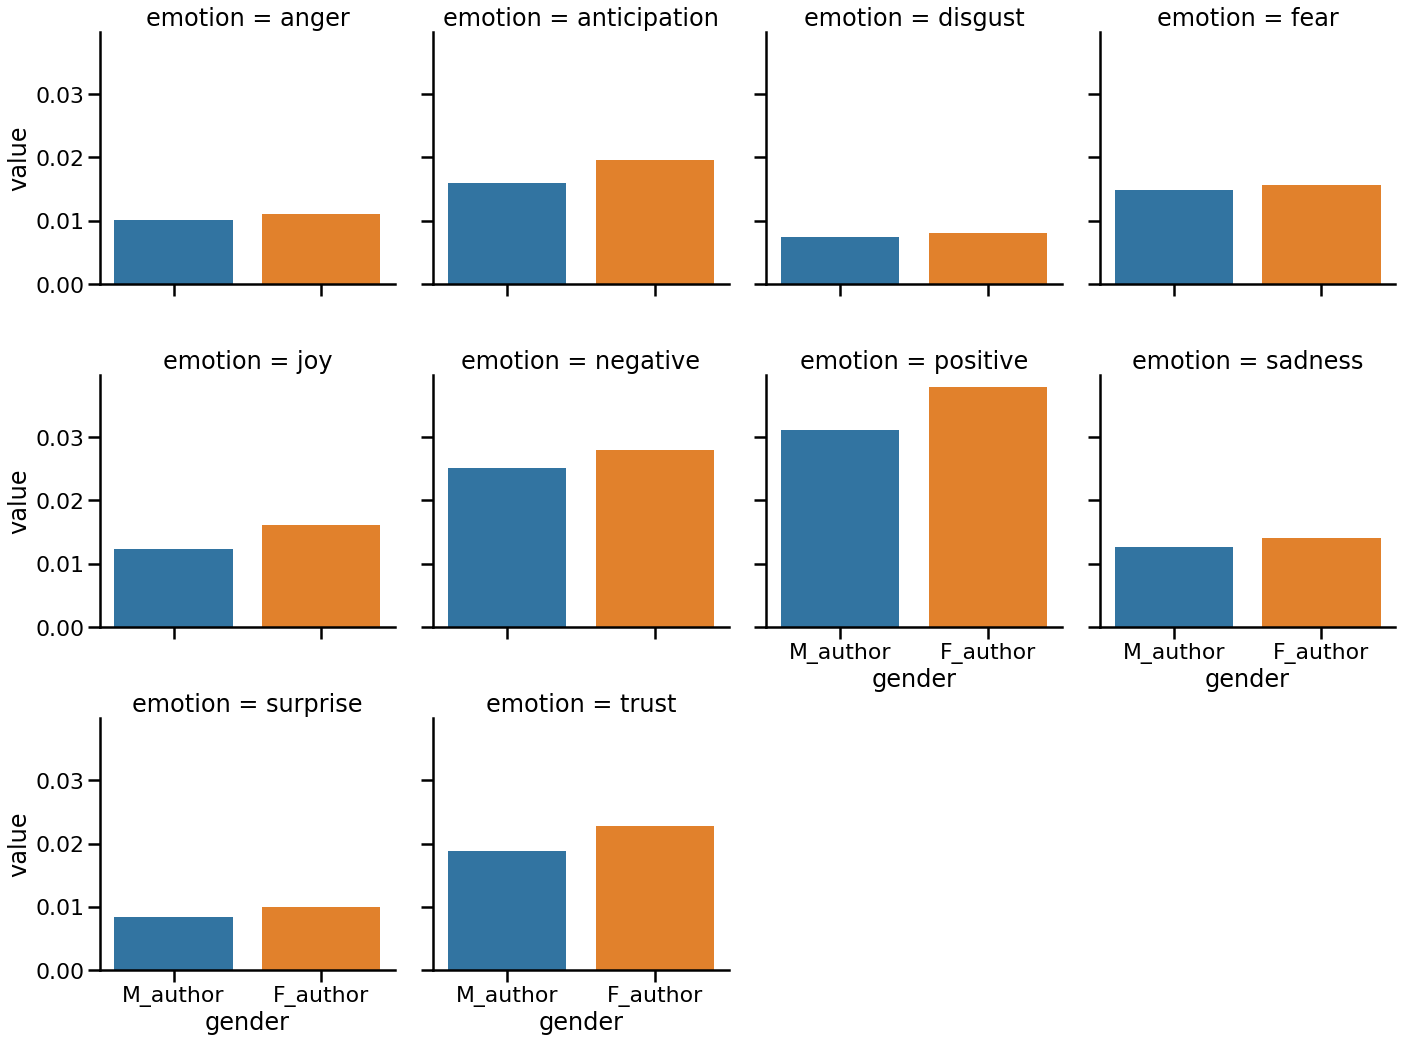

In [18]:
g = visualize_emotion_scores(final_dict)

In [33]:
features = data.drop(['owner','check_1','check_2','gender','title','filename','author_surname','author_givenname','genre', 'source_url', 'downloads', 'dFemale'], axis =1) #setting features to look at (by dropping unwanted ones)
target = data['gender'] #setting target we want to look at (y var)
target = target.astype(float) # making target into float

In [44]:
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
x = data[['age', 'dHorror', 'dFemale']]
y = data['positive']
y = y.astype(float)
lin_model=sm.OLS(y,x.astype(float)) #linear regression model
result_lin=lin_model.fit() 
print(result_lin.summary())
print(result_lin.pvalues)

                                 OLS Regression Results                                
Dep. Variable:               positive   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              267.7
Date:                Tue, 27 Oct 2020   Prob (F-statistic):                    3.80e-56
Time:                        11:24:41   Log-Likelihood:                          388.76
No. Observations:                 136   AIC:                                     -771.5
Df Residuals:                     133   BIC:                                     -762.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [45]:
# from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
model = ExtraTreesClassifier()
model.fit(features,target)
# print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
print(feat_importances.nlargest(10))
top = (feat_importances.nlargest(10).index) #variable holding the indexes (the label names of the 10 most important features)

dHorror         0.087206
horror          0.078913
joy             0.071364
birth_year      0.061653
anticipation    0.044706
year            0.043951
country         0.041089
surprise        0.037702
trust           0.035444
positive        0.034941
dtype: float64


In [46]:
scaler = StandardScaler()
features = scaler.fit_transform(features) # normalizing the scale for looking at features 

In [47]:
classifiers = { # for classification models
    'kNN': KNeighborsClassifier(),
    'Decision tree':DecisionTreeClassifier(),
    'Logit':LogisticRegression(),
    'Random forest':RandomForestClassifier()
}
scores = {} 
for i in classifiers: 
    scores[i] = cross_validate( 
        classifiers[i], 
        features, 
        target,
        cv=10,
        scoring=['accuracy'] 
    )
compare_scores(scores) #using compare scores (given from class) and cross validation to see the accuracy of models

,fit_time,score_time,test_accuracy
kNN,0.007876,0.011247,0.637363
Decision tree,0.001626,0.000549,0.779670
Logit,0.026708,0.000391,0.750000
Random forest,0.127116,0.009432,0.831868


In [48]:
features_10 = data[list(top)] #using features_10 as the top 10 features 
features_10 = scaler.fit_transform(features_10) #normalizing the features_10 values
classifiers_10 = { 
    'kNN': KNeighborsClassifier(),
    'Decision tree':DecisionTreeClassifier(),
    'Logit':LogisticRegression(),
    'Random forest':RandomForestClassifier()
}
scores_10 = {} 
for i in classifiers_10: 
    scores_10[i] = cross_validate( 
        classifiers_10[i], 
        features_10, 
        target,
        cv=10,
        scoring=['accuracy'] 
    )
compare_scores(scores_10)

,fit_time,score_time,test_accuracy
kNN,0.001494,0.002253,0.725824
Decision tree,0.001579,0.000787,0.728571
Logit,0.006668,0.000385,0.717033
Random forest,0.115039,0.007472,0.817033


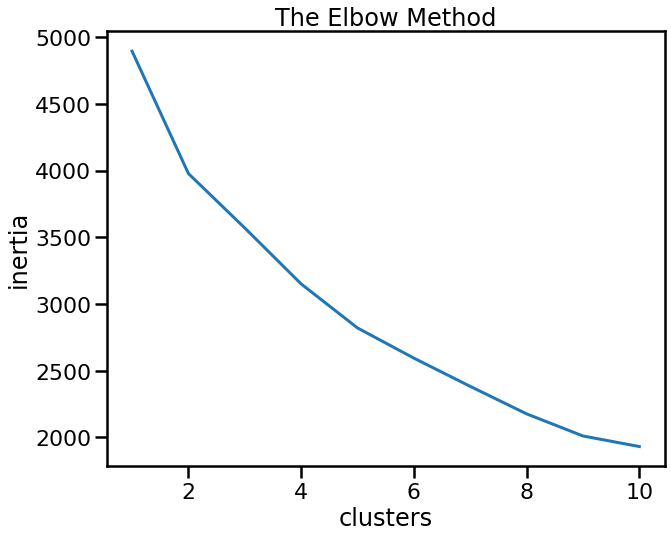

In [28]:
plt.figure(figsize=(10, 8))
interia = []
for i in range(1, 11):
    model = KMeans(n_clusters = i)
    model.fit(features)
    interia.append(model.inertia_)
plt.plot(range(1, 11), interia)
plt.title('The Elbow Method')
plt.xlabel('clusters')
plt.ylabel('inertia') #inertia is also known as within-cluster sum-of-squares and they are supposed to measure centroid distances,
#so in the graph when it starts to level off- it is usually seen as the optimal amount of clusters (this is known as the elbow method)
plt.show() #trying to find the most 

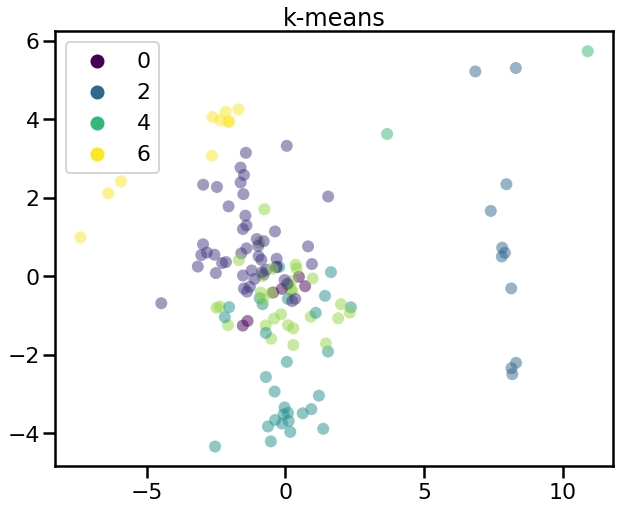

In [64]:
kmeans = KMeans(n_clusters=7) # using K-means 
y_kmeans = kmeans.fit_predict(features)
coordinates = TruncatedSVD().fit_transform(features)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=coordinates[:, 0], 
    y=coordinates[:, 1],
    hue=y_kmeans,
    alpha=.5,
    palette='viridis',
    linewidth=0
    )
plt.title('k-means')
plt.show()

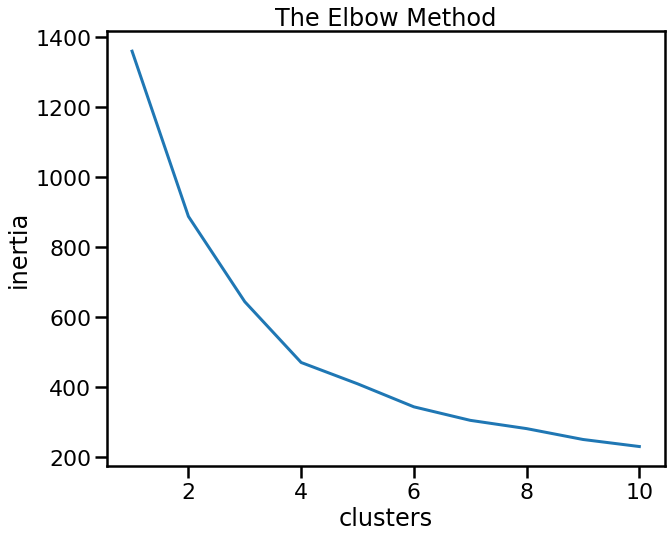

In [61]:
plt.figure(figsize=(10, 8))
interia_10 = []
for i in range(1, 11):
    model = KMeans(n_clusters = i)
    model.fit(features_10)
    interia_10.append(model.inertia_)
plt.plot(range(1, 11), interia_10)
plt.title('The Elbow Method')
plt.xlabel('clusters')
plt.ylabel('inertia') #inertia is also known as within-cluster sum-of-squares and they are supposed to measure centroid distances,
#so in the graph when it starts to level off- it is usually seen as the optimal amount of clusters (this is known as the elbow method)
plt.show() #trying to find the most 

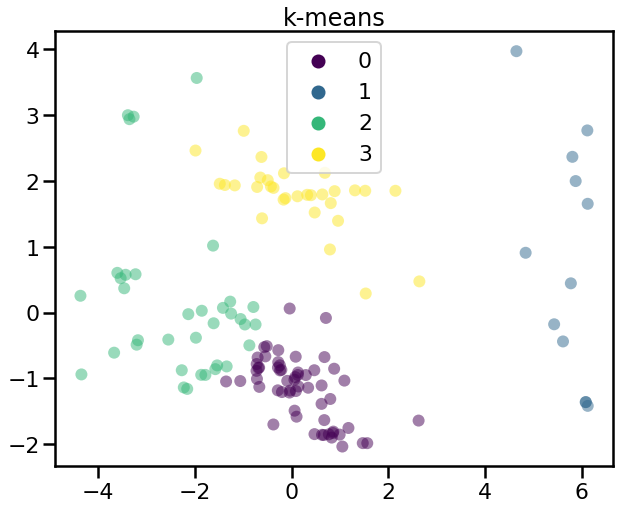

In [62]:
kmeans_10 = KMeans(n_clusters=4) # using K-means 
y_kmeans_10 = kmeans_10.fit_predict(features_10)
coordinates_10 = TruncatedSVD().fit_transform(features_10)
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=coordinates_10[:, 0], 
    y=coordinates_10[:, 1],
    hue=y_kmeans_10,
    alpha=.5,
    palette='viridis',
    linewidth=0
    )
plt.title('k-means')
plt.show()

# 4. Results and discussion

We first tried Vader sentiment analysis and got very polarized compound scores. By definition, 
compound score is a ‘normalized, weighted composite score computed by summing the valence scores 
of each word in the lexicon, adjusted according to the rules, and then normalized 
to be between -1 (most extreme negative) and +1 (most extreme positive).

So, we decided not to use the scores generated from Vader method because looking at the extreme compound values 
and positive/negative composition together, the compound score are not very informational and accurate. 

Then we used the emolex provided in class and the result makes more sense, so we add the emotion values from 
emolex into our dataframe as our indicator. 


# 5. Reflection

# 6. Responsibility and resources consulted